# Tarea 2. NN with Logistic regression, Problema 2

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from pandas.tools.plotting import scatter_matrix
from matplotlib.artist import setp
import time

plt.rcParams['figure.figsize'] = (10,16)

In [2]:
df1     = pd.io.excel.read_excel("DatosPunto2.xlsx", sheetname=0)
letters = df1.iloc[:,0].copy()
df1 = df1.iloc[:,1:16].copy()
#normalización min-max
str_comp = 'ARNGOZPT'
#df1 = (df1-np.min(df1, axis = 0))/(np.max(df1, axis = 0)-np.min(df1, axis = 0))
df1 = (df1-np.mean(df1, axis = 0))/(np.std(df1, axis = 0))
X = np.array(df1)
y = np.zeros((X.shape[0],1))
i = 0
for L in letters:
    if str_comp.find(L) >= 0:
        print('letra '+str(L)+' aparece en apellidos')
        y[i,:] = 1.0
    else:
        print('letra '+str(L)+' no aparece en apellidos')
    i += 1

letra T aparece en apellidos
letra I no aparece en apellidos
letra D no aparece en apellidos
letra N aparece en apellidos
letra G aparece en apellidos
letra S no aparece en apellidos
letra B no aparece en apellidos
letra A aparece en apellidos
letra J no aparece en apellidos
letra M no aparece en apellidos
letra X no aparece en apellidos
letra O aparece en apellidos
letra G aparece en apellidos
letra M no aparece en apellidos
letra R aparece en apellidos
letra F no aparece en apellidos
letra O aparece en apellidos
letra C no aparece en apellidos
letra T aparece en apellidos
letra J no aparece en apellidos
letra J no aparece en apellidos
letra H no aparece en apellidos
letra S no aparece en apellidos
letra O aparece en apellidos
letra J no aparece en apellidos
letra C no aparece en apellidos
letra M no aparece en apellidos
letra W no aparece en apellidos
letra H no aparece en apellidos
letra G aparece en apellidos
letra L no aparece en apellidos
letra L no aparece en apellidos
letra X n

letra U no aparece en apellidos
letra V no aparece en apellidos
letra J no aparece en apellidos
letra B no aparece en apellidos
letra H no aparece en apellidos
letra D no aparece en apellidos
letra S no aparece en apellidos
letra L no aparece en apellidos
letra Q no aparece en apellidos
letra H no aparece en apellidos
letra M no aparece en apellidos
letra C no aparece en apellidos
letra R aparece en apellidos
letra G aparece en apellidos
letra A aparece en apellidos
letra O aparece en apellidos
letra I no aparece en apellidos
letra V no aparece en apellidos
letra V no aparece en apellidos
letra A aparece en apellidos
letra K no aparece en apellidos
letra V no aparece en apellidos
letra C no aparece en apellidos
letra L no aparece en apellidos
letra H no aparece en apellidos
letra U no aparece en apellidos
letra N aparece en apellidos
letra D no aparece en apellidos
letra Q no aparece en apellidos
letra X no aparece en apellidos
letra N aparece en apellidos
letra N aparece en apellidos


letra F no aparece en apellidos
letra C no aparece en apellidos
letra P aparece en apellidos
letra Q no aparece en apellidos
letra E no aparece en apellidos
letra M no aparece en apellidos
letra M no aparece en apellidos
letra G aparece en apellidos
letra H no aparece en apellidos
letra H no aparece en apellidos
letra I no aparece en apellidos
letra O aparece en apellidos
letra S no aparece en apellidos
letra Q no aparece en apellidos
letra B no aparece en apellidos
letra W no aparece en apellidos
letra Z aparece en apellidos
letra O aparece en apellidos
letra S no aparece en apellidos
letra Q no aparece en apellidos
letra U no aparece en apellidos
letra H no aparece en apellidos
letra T aparece en apellidos
letra L no aparece en apellidos
letra C no aparece en apellidos
letra C no aparece en apellidos
letra H no aparece en apellidos
letra X no aparece en apellidos
letra H no aparece en apellidos
letra E no aparece en apellidos
letra A aparece en apellidos
letra F no aparece en apellid

letra T aparece en apellidos
letra B no aparece en apellidos
letra B no aparece en apellidos
letra V no aparece en apellidos
letra Z aparece en apellidos
letra X no aparece en apellidos
letra S no aparece en apellidos
letra V no aparece en apellidos
letra R aparece en apellidos
letra U no aparece en apellidos
letra J no aparece en apellidos
letra Q no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra S no aparece en apellidos
letra C no aparece en apellidos
letra Q no aparece en apellidos
letra H no aparece en apellidos
letra M no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra E no aparece en apellidos
letra G aparece en apellidos
letra T aparece en apellidos
letra F no aparece en apellidos
letra J no aparece en apellidos
letra P aparece en apellidos
letra D no aparece en apellidos
letra L no aparece en apellidos
letra G aparece en apellidos
letra Q no aparece en apellidos
letra L no aparece en apellid

letra L no aparece en apellidos
letra E no aparece en apellidos
letra T aparece en apellidos
letra X no aparece en apellidos
letra U no aparece en apellidos
letra G aparece en apellidos
letra I no aparece en apellidos
letra Q no aparece en apellidos
letra I no aparece en apellidos
letra W no aparece en apellidos
letra C no aparece en apellidos
letra B no aparece en apellidos
letra H no aparece en apellidos
letra X no aparece en apellidos
letra Q no aparece en apellidos
letra O aparece en apellidos
letra O aparece en apellidos
letra I no aparece en apellidos
letra R aparece en apellidos
letra N aparece en apellidos
letra N aparece en apellidos
letra C no aparece en apellidos
letra V no aparece en apellidos
letra X no aparece en apellidos
letra Q no aparece en apellidos
letra E no aparece en apellidos
letra V no aparece en apellidos
letra I no aparece en apellidos
letra U no aparece en apellidos
letra W no aparece en apellidos
letra D no aparece en apellidos
letra C no aparece en apellid

letra O aparece en apellidos
letra X no aparece en apellidos
letra P aparece en apellidos
letra A aparece en apellidos
letra B no aparece en apellidos
letra R aparece en apellidos
letra C no aparece en apellidos
letra Z aparece en apellidos
letra B no aparece en apellidos
letra M no aparece en apellidos
letra G aparece en apellidos
letra X no aparece en apellidos
letra M no aparece en apellidos
letra Z aparece en apellidos
letra R aparece en apellidos
letra M no aparece en apellidos
letra H no aparece en apellidos
letra W no aparece en apellidos
letra N aparece en apellidos
letra V no aparece en apellidos
letra J no aparece en apellidos
letra T aparece en apellidos
letra N aparece en apellidos
letra B no aparece en apellidos
letra V no aparece en apellidos
letra C no aparece en apellidos
letra A aparece en apellidos
letra F no aparece en apellidos
letra O aparece en apellidos
letra I no aparece en apellidos
letra L no aparece en apellidos
letra E no aparece en apellidos
letra A aparece

letra G aparece en apellidos
letra C no aparece en apellidos
letra N aparece en apellidos
letra T aparece en apellidos
letra K no aparece en apellidos
letra F no aparece en apellidos
letra X no aparece en apellidos
letra F no aparece en apellidos
letra O aparece en apellidos
letra W no aparece en apellidos
letra Y no aparece en apellidos
letra J no aparece en apellidos
letra U no aparece en apellidos
letra V no aparece en apellidos
letra Z aparece en apellidos
letra T aparece en apellidos
letra E no aparece en apellidos
letra J no aparece en apellidos
letra W no aparece en apellidos
letra D no aparece en apellidos
letra M no aparece en apellidos
letra S no aparece en apellidos
letra T aparece en apellidos
letra V no aparece en apellidos
letra O aparece en apellidos
letra D no aparece en apellidos
letra B no aparece en apellidos
letra Q no aparece en apellidos
letra L no aparece en apellidos
letra S no aparece en apellidos
letra U no aparece en apellidos
letra L no aparece en apellidos


letra S no aparece en apellidos
letra C no aparece en apellidos
letra H no aparece en apellidos
letra C no aparece en apellidos
letra L no aparece en apellidos
letra V no aparece en apellidos
letra T aparece en apellidos
letra J no aparece en apellidos
letra H no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra D no aparece en apellidos
letra B no aparece en apellidos
letra C no aparece en apellidos
letra M no aparece en apellidos
letra S no aparece en apellidos
letra F no aparece en apellidos
letra R aparece en apellidos
letra W no aparece en apellidos
letra I no aparece en apellidos
letra X no aparece en apellidos
letra N aparece en apellidos
letra W no aparece en apellidos
letra S no aparece en apellidos
letra P aparece en apellidos
letra N aparece en apellidos
letra M no aparece en apellidos
letra F no aparece en apellidos
letra Q no aparece en apellidos
letra X no aparece en apellidos
letra S no aparece en apellidos
letra V no aparece en a

letra B no aparece en apellidos
letra C no aparece en apellidos
letra I no aparece en apellidos
letra P aparece en apellidos
letra Y no aparece en apellidos
letra S no aparece en apellidos
letra G aparece en apellidos
letra L no aparece en apellidos
letra B no aparece en apellidos
letra C no aparece en apellidos
letra X no aparece en apellidos
letra A aparece en apellidos
letra W no aparece en apellidos
letra W no aparece en apellidos
letra M no aparece en apellidos
letra S no aparece en apellidos
letra D no aparece en apellidos
letra Y no aparece en apellidos
letra Q no aparece en apellidos
letra B no aparece en apellidos
letra F no aparece en apellidos
letra R aparece en apellidos
letra J no aparece en apellidos
letra W no aparece en apellidos
letra N aparece en apellidos
letra U no aparece en apellidos
letra N aparece en apellidos
letra V no aparece en apellidos
letra D no aparece en apellidos
letra A aparece en apellidos
letra H no aparece en apellidos
letra F no aparece en apellid

letra S no aparece en apellidos
letra L no aparece en apellidos
letra L no aparece en apellidos
letra P aparece en apellidos
letra N aparece en apellidos
letra B no aparece en apellidos
letra T aparece en apellidos
letra Z aparece en apellidos
letra L no aparece en apellidos
letra I no aparece en apellidos
letra S no aparece en apellidos
letra V no aparece en apellidos
letra B no aparece en apellidos
letra R aparece en apellidos
letra T aparece en apellidos
letra H no aparece en apellidos
letra Y no aparece en apellidos
letra A aparece en apellidos
letra K no aparece en apellidos
letra D no aparece en apellidos
letra I no aparece en apellidos
letra F no aparece en apellidos
letra Q no aparece en apellidos
letra X no aparece en apellidos
letra B no aparece en apellidos
letra M no aparece en apellidos
letra X no aparece en apellidos
letra L no aparece en apellidos
letra Q no aparece en apellidos
letra J no aparece en apellidos
letra T aparece en apellidos
letra P aparece en apellidos
let

letra C no aparece en apellidos
letra I no aparece en apellidos
letra A aparece en apellidos
letra I no aparece en apellidos
letra O aparece en apellidos
letra J no aparece en apellidos
letra Z aparece en apellidos
letra S no aparece en apellidos
letra R aparece en apellidos
letra S no aparece en apellidos
letra L no aparece en apellidos
letra Q no aparece en apellidos
letra Q no aparece en apellidos
letra V no aparece en apellidos
letra R aparece en apellidos
letra O aparece en apellidos
letra R aparece en apellidos
letra F no aparece en apellidos
letra N aparece en apellidos
letra J no aparece en apellidos
letra P aparece en apellidos
letra B no aparece en apellidos
letra E no aparece en apellidos
letra S no aparece en apellidos
letra N aparece en apellidos
letra L no aparece en apellidos
letra I no aparece en apellidos
letra C no aparece en apellidos
letra D no aparece en apellidos
letra D no aparece en apellidos
letra R aparece en apellidos
letra S no aparece en apellidos
letra N a

letra L no aparece en apellidos
letra I no aparece en apellidos
letra D no aparece en apellidos
letra N aparece en apellidos
letra I no aparece en apellidos
letra U no aparece en apellidos
letra I no aparece en apellidos
letra D no aparece en apellidos
letra E no aparece en apellidos
letra G aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra R aparece en apellidos
letra E no aparece en apellidos
letra M no aparece en apellidos
letra Y no aparece en apellidos
letra I no aparece en apellidos
letra E no aparece en apellidos
letra Q no aparece en apellidos
letra Z aparece en apellidos
letra S no aparece en apellidos
letra W no aparece en apellidos
letra G aparece en apellidos
letra T aparece en apellidos
letra Q no aparece en apellidos
letra X no aparece en apellidos
letra A aparece en apellidos
letra A aparece en apellidos
letra W no aparece en apellidos
letra A aparece en apellidos
letra Y no aparece en apellidos
letra L no aparece en apellidos
let

letra K no aparece en apellidos
letra M no aparece en apellidos
letra S no aparece en apellidos
letra D no aparece en apellidos
letra E no aparece en apellidos
letra C no aparece en apellidos
letra I no aparece en apellidos
letra T aparece en apellidos
letra Z aparece en apellidos
letra M no aparece en apellidos
letra T aparece en apellidos
letra Q no aparece en apellidos
letra H no aparece en apellidos
letra E no aparece en apellidos
letra V no aparece en apellidos
letra Z aparece en apellidos
letra W no aparece en apellidos
letra V no aparece en apellidos
letra F no aparece en apellidos
letra T aparece en apellidos
letra R aparece en apellidos
letra G aparece en apellidos
letra L no aparece en apellidos
letra Y no aparece en apellidos
letra A aparece en apellidos
letra N aparece en apellidos
letra M no aparece en apellidos
letra P aparece en apellidos
letra V no aparece en apellidos
letra V no aparece en apellidos
letra G aparece en apellidos
letra I no aparece en apellidos
letra F n

letra N aparece en apellidos
letra E no aparece en apellidos
letra L no aparece en apellidos
letra A aparece en apellidos
letra K no aparece en apellidos
letra M no aparece en apellidos
letra R aparece en apellidos
letra S no aparece en apellidos
letra Y no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra M no aparece en apellidos
letra O aparece en apellidos
letra L no aparece en apellidos
letra D no aparece en apellidos
letra P aparece en apellidos
letra W no aparece en apellidos
letra O aparece en apellidos
letra E no aparece en apellidos
letra J no aparece en apellidos
letra T aparece en apellidos
letra D no aparece en apellidos
letra C no aparece en apellidos
letra T aparece en apellidos
letra S no aparece en apellidos
letra A aparece en apellidos


In [3]:
X_original = X
y_original = y

Nsamples = X.shape[0]
Ntrain   = int(0.7*Nsamples)
Nval     = int(0.15*Nsamples)
Ntest    = Nsamples-Ntrain-Nval

X_test = X[(Nsamples-Ntest):Nsamples,:]
y_test = y[(Nsamples-Ntest):Nsamples,:]

Xv = X[0:(Nsamples-Ntest),:]
yv = y[0:(Nsamples-Ntest),:]

In [4]:
def sigmoid(x,deriv=False):
    return (1.0/(1.0+np.exp(-x)))

def LogisticRegression(X,y,alpha=0.1,lamda=0.1,iteraciones=500):   
    
    [M,N] = X.shape
    
        
    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    
    theta = np.random.rand(N+1,1)
    
    for j in range(0,iteraciones):

        h_x = np.dot(X,theta)
        h_x = sigmoid(h_x)
        
        J0 = (1-y)*np.log(1-h_x)
        J1 = y*np.log(h_x)

        J0[np.isinf(J0)]=0
        J1[np.isinf(J1)]=0
        
        J0 = -1/M * np.sum(J0)
        J1 = -1/M * np.sum(J1)
        
        J = J1+J0
        dJ_dtheta = (1/(M)*np.dot((h_x-y).T,X).T)
        theta = theta - alpha* dJ_dtheta
        #print(theta.shape)
    
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
    #print(J0,J1)
    return [theta,h_x,J]

def Predict(X,theta):
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]

    X = np.insert(X,0,1)
    h_x = np.dot(X,theta)
    h_x = sigmoid(h_x)
    return h_x

validación  1  Función de error:  0.9589385485541219
validación  2  Función de error:  1.0809149206467683
validación  3  Función de error:  0.9457601239155577
validación  4  Función de error:  1.0229044427620364
validación  5  Función de error:  1.022998543962468
validación  6  Función de error:  0.9706021008160803
validación  7  Función de error:  0.9640490842567452
validación  8  Función de error:  0.913642258222227
validación  9  Función de error:  1.0964253321570951
validación  10  Función de error:  0.985642556321873


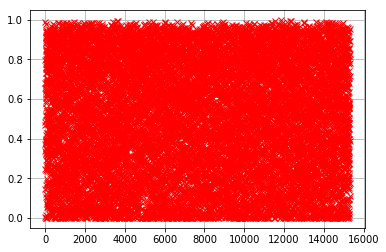

In [5]:
from sklearn.model_selection import KFold
X = Xv
y = yv
Nf = 10
N  = X.shape[0]
kf = KFold(n_splits=Nf)

error_train = np.zeros((Nf,))
error_val   = np.zeros((Nf,))
k=0
error_min = np.inf
for train_index, test_index in kf.split(X):
    [wReg,predicted1,E] = LogisticRegression(X[train_index],y[train_index],iteraciones=1000, alpha = 0.0017)
    #decision = np.max(predicted1)/2+np.min(predicted1)/2
    decision = 0.5
    error1 = np.sum(((np.array(predicted1) > decision)*y[train_index]==1.0))/y[train_index].shape[0]
    
    predicted2 = []
    for j in range(0,X[test_index].shape[0]):
        predicted2.append(Predict(X[test_index][j,:],wReg))
    #decision = np.max(predicted2)/2+np.min(predicted2)/2
    error2 = np.sum(((np.array(predicted2) > decision)*y[test_index ]==1.0))/y[test_index ].shape[0]
    
    if(error2 < error_min):
        wReg_optimo = wReg
        error_min = error2
        index_max = k
    print('validación ',(k+1),' Función de error: ',str(E))
    error_train[k,] = error1
    error_val[k,]  = error2
    k+=1
plt.plot(predicted1,'rx')

plt.grid()
plt.show()


In [6]:
d  = {'1. error de entrenamiento: ': error_train,'2. error de validación':error_val}
df = pd.DataFrame(data=d)
df

,1. error de entrenamiento:,2. error de validación
0,0.209477,0.182353
1,0.196405,0.191765
2,0.143464,0.157059
3,0.173137,0.181765
4,0.179739,0.180588
5,0.175425,0.155882
6,0.155359,0.163529
7,0.116928,0.122353
8,0.169608,0.170000
9,0.163137,0.157059


In [7]:
Accuracy_train = 1-np.mean(error_train)
Accuracy_val   = 1-np.mean(error_val  )

print('tasa de entrenamiento: '+ str(Accuracy_train)+', tasa de validación: '+str(Accuracy_val))

tasa de entrenamiento: 0.8317320261437908, tasa de validación: 0.833764705882353


In [8]:
#utilizando la toopología óptima
predicted_testing = []
for j in range(0,X_test.shape[0]):
    predicted_testing.append(Predict(X_test[j,:],wReg_optimo))
decision = 0.5
Accuracy_test = 1-np.sum(((np.array(predicted_testing) > decision)*y_test==1.0))/y_test.shape[0]
print('tasa de testeo: '+ str(Accuracy_test))

tasa de testeo: 0.8766666666666667
